In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
iris = pd.read_csv(r'C:\Users\User\Downloads\iris.csv')
iris = pd.DataFrame(iris)

In [3]:
print(iris.shape)

(150, 5)


In [4]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

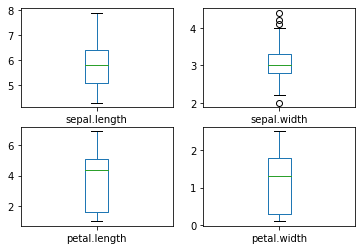

In [7]:
iris.plot(kind='box',subplots = True, layout = (2,2),sharex = False,sharey = False)
plt.show()

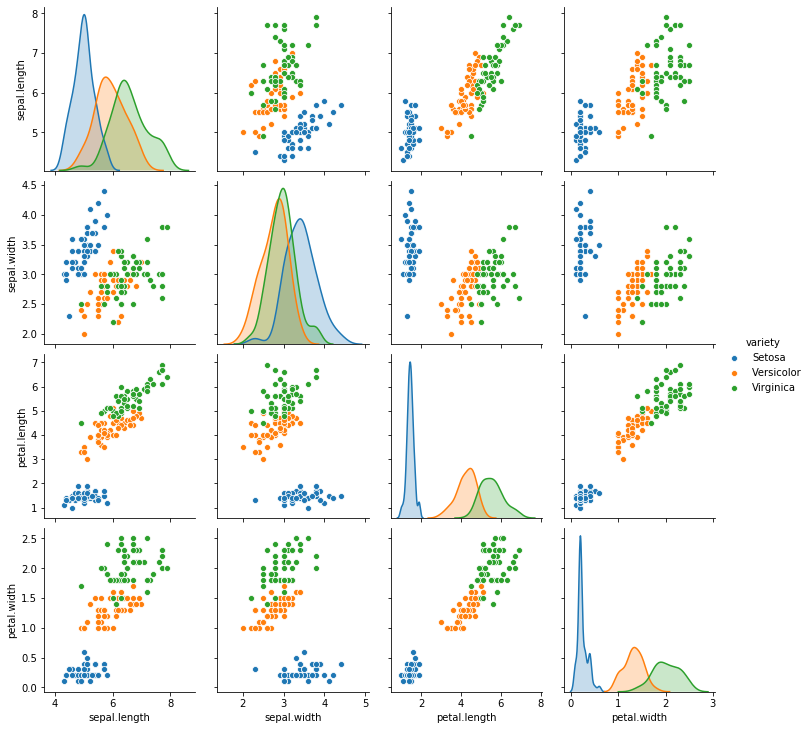

In [8]:
sns.pairplot(iris, hue='variety')

1. Some pairwise relationships between Iris Versicolour and Virginica
2. Iris Setosa is less related with the other two and have distinct features
3. Most of the cluster relationships of Iris Versicolour and Virginica overlap where for seta it is seperated
4. We can observe that very few 

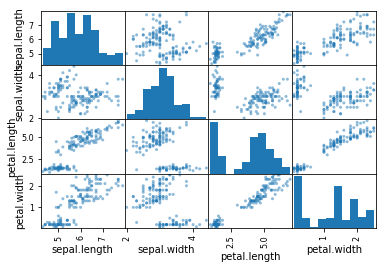

In [9]:
scatter_matrix(iris)
plt.show()

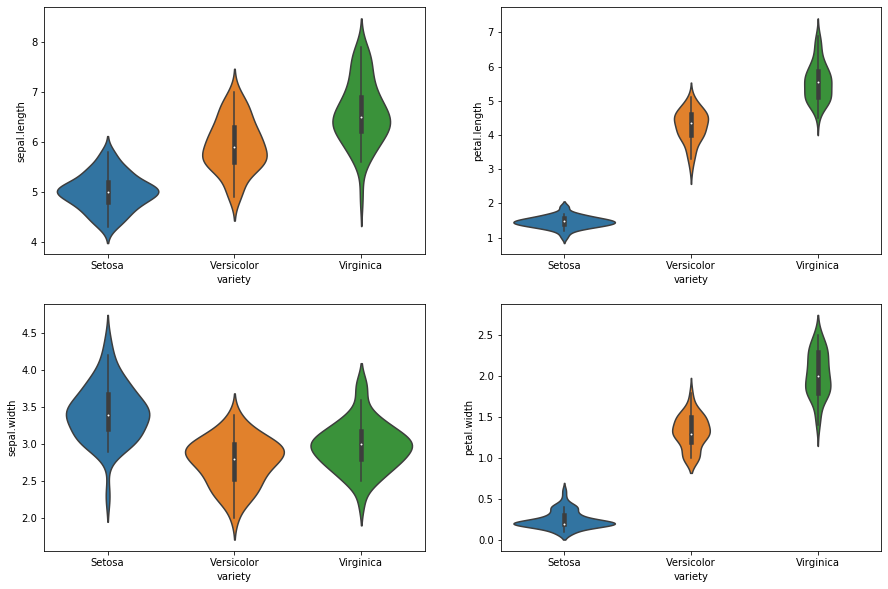

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='petal.width',data=iris)

## Outliers and Distribution  
### Outliers are present for the following features for the following classes 
* Sepal length - iris virginica
* Sepal Widhth - iris setoss
* Petal Length - Iris Versicolor and virginica
* Petal Width - Iris Virginica

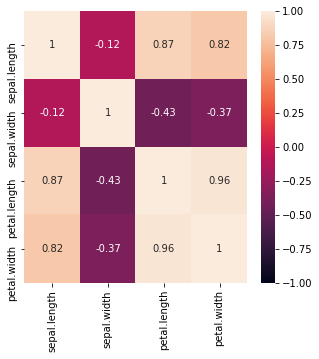

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(iris.corr(),
            vmin=-1,
            annot=True);

### Correlation Analysis
#### High correlation is observed for 
* Petal Length and Sepal Width
* Petal Width and Sepal Width

In [12]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [13]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y = y.values.ravel()

In [14]:
print('X shape is',x.shape,'\nY shape is',y.shape)

X shape is (150, 4) 
Y shape is (150,)


In [15]:
type(x)

pandas.core.frame.DataFrame

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc =sc.fit_transform(x)

In [17]:

x_train,x_test,y_train,y_test = model_selection.train_test_split(x_sc,y,test_size = 0.2,random_state = 123)

In [18]:
print('X train shape is',x_train.shape,'\nX Test shape is',x_test.shape)
print('Y train shape is',y_train.shape,'\nY Test shape is',x_test.shape)

X train shape is (120, 4) 
X Test shape is (30, 4)
Y train shape is (120,) 
Y Test shape is (30, 4)


In [32]:
# experimenting with different n values
k_value = list(range(1,26))
pscores = []
ascores = []
rscores = []
for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    pscores.append(precision_score(y_test,y_pred_knn, average=None)[1])
    ascores.append(accuracy_score(y_test,y_pred_knn))
    rscores.append(recall_score(y_test,y_pred_knn, average=None)[2])

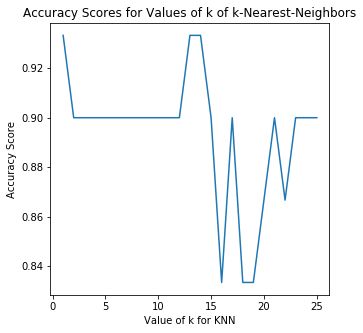

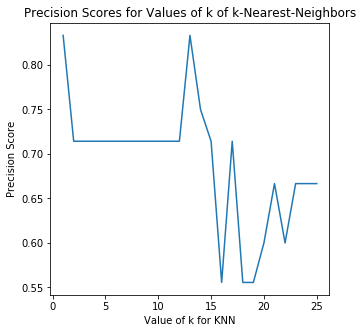

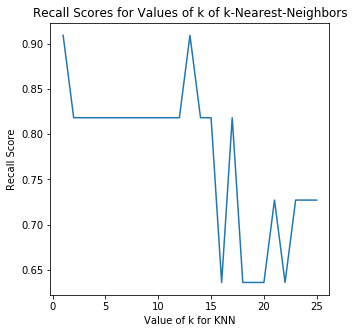

In [33]:
plt.figure(figsize=(5,5))
plt.plot(k_value,ascores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(k_value,pscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(k_value,rscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [34]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred_log = log.predict(x_test)
print(precision_score(y_test,y_pred_log, average=None)[1])
print(accuracy_score(y_test,y_pred_log))
print(recall_score(y_test,y_pred_log, average=None)[2])

0.8571428571428571
0.9666666666666667
0.9090909090909091


Neighbor , k =13 seems to have a good accuracy. So Choosing that value for the model

In [42]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [43]:
knn.predict(([[5.2, 4, 4, 3]]))

array(['Virginica'], dtype=object)

In [44]:
knn.predict(([[5.1,3.5,1.4,0.2]]))

array(['Virginica'], dtype=object)

In [39]:
svc = SVC(gamma = 'scale')
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.9333333333333333

In [50]:
svc.predict(([[5.1,3.5,1.4,0.2]]))

array(['Virginica'], dtype=object)